In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
#Load the data 
file_path = 'netflix_data.csv'


In [5]:
#Read the data
netflix_data = pd.read_csv(file_path)

In [6]:
#Show data types of the columns
print(netflix_data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
#Show the first 5 rows of the data
print(netflix_data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [25]:
netflix_data.dropna(subset=['rating'], inplace=True)

In [26]:
netflix_data.dropna(subset=['date_added'], inplace=True)

In [27]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

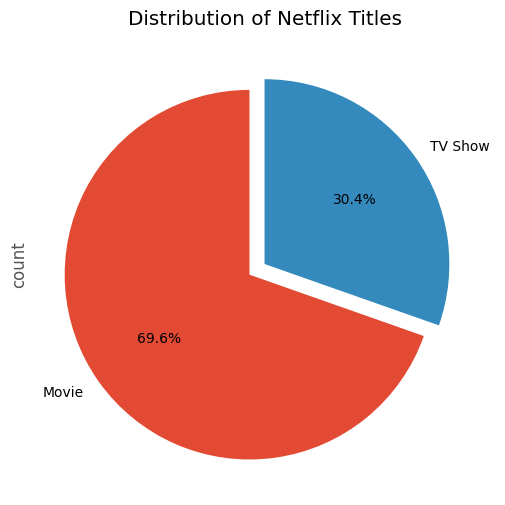

In [16]:
#Show how many movies and TV shows are in the dataset in a pie chart
plt.figure(figsize=(12, 6))
plt.title('Distribution of Netflix Titles')
netflix_data['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.show()


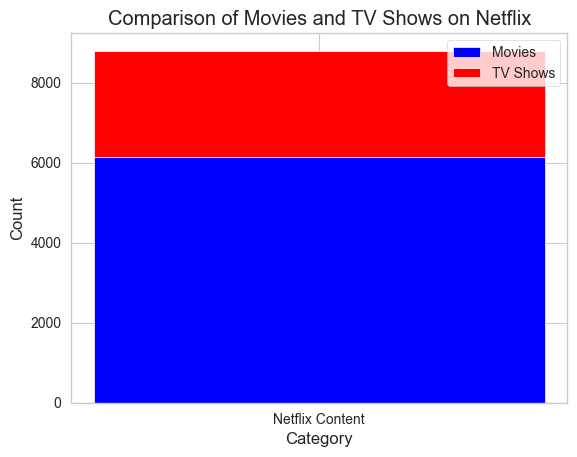

In [31]:
# Count Movies and TV Shows
type_counts = netflix_data['type'].value_counts()

# Plot stacked bar chart
plt.bar(['Netflix Content'], [type_counts['Movie']], label='Movies', color='blue')
plt.bar(['Netflix Content'], [type_counts['TV Show']], bottom=[type_counts['Movie']], label='TV Shows', color='red')

# Labels & Title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Comparison of Movies and TV Shows on Netflix")
plt.legend()

# Show the chart
plt.show()

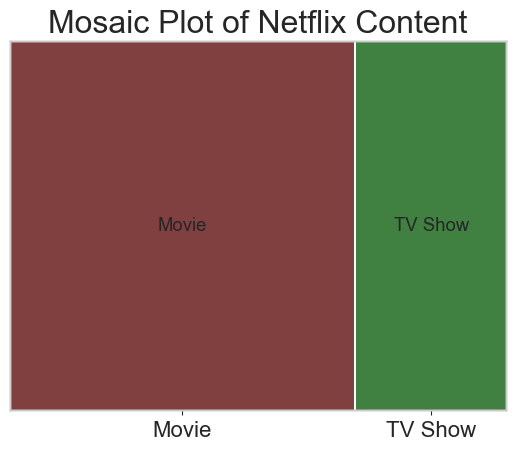

In [32]:
#Perform mosaic plot to show how many tv shows vs movies are in the dataset
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(netflix_data, ['type'], title='Mosaic Plot of Netflix Content')
plt.show()


In [35]:
#Check how many values are in the country column
print(netflix_data['country'].value_counts())

country
United States                                    2812
India                                             972
United Kingdom                                    418
Japan                                             244
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64


In [36]:
#Data Cleaning on "Countries" , show  unique values 
netflix_data.dropna(subset=['country'], inplace=True)
print(netflix_data['country'].unique())



['United States' 'South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United States, Germa

In [43]:
#Perform  groupby on the country column and show the first most used country
country_count = netflix_data['country'].value_counts()
print(country_count.head(8))

#Store the first most used country in a variable
top_countries = country_count.idxmax()
print(top_countries)    

country
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Name: count, dtype: int64
United States


<Figure size 1000x600 with 0 Axes>

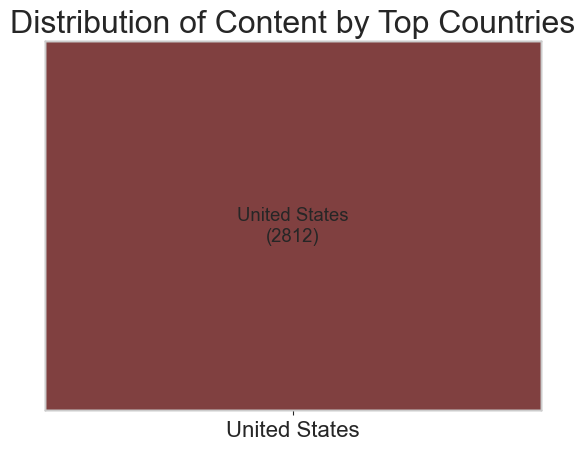

In [52]:
# Convert dataset into a dictionary format required for mosaic plot
data_dict = top_country_data['country'].value_counts().to_dict()

# Create a mosaic plot with value counts
plt.figure(figsize=(10, 6))
mosaic(data_dict, title="Distribution of Content by Top Countries", labelizer=lambda k: f"{k[0]}\n({data_dict[k[0]]})")

# Show plot
plt.show()

<Figure size 1000x600 with 0 Axes>

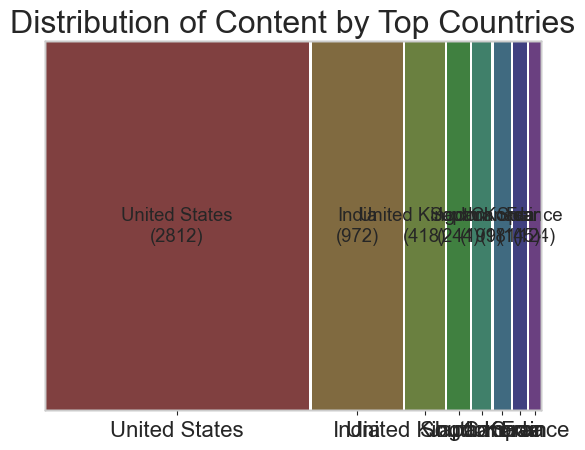

In [54]:
#Show on the mosaic plot the 8 top countries
top_countries = netflix_data['country'].value_counts().head(8).index
top_country_data = netflix_data[netflix_data['country'].isin(top_countries)]
data_dict = top_country_data['country'].value_counts().to_dict()
plt.figure(figsize=(10, 6))
mosaic(data_dict, title="Distribution of Content by Top Countries", labelizer=lambda k: f"{k[0]}\n({data_dict[k[0]]})")
plt.show()

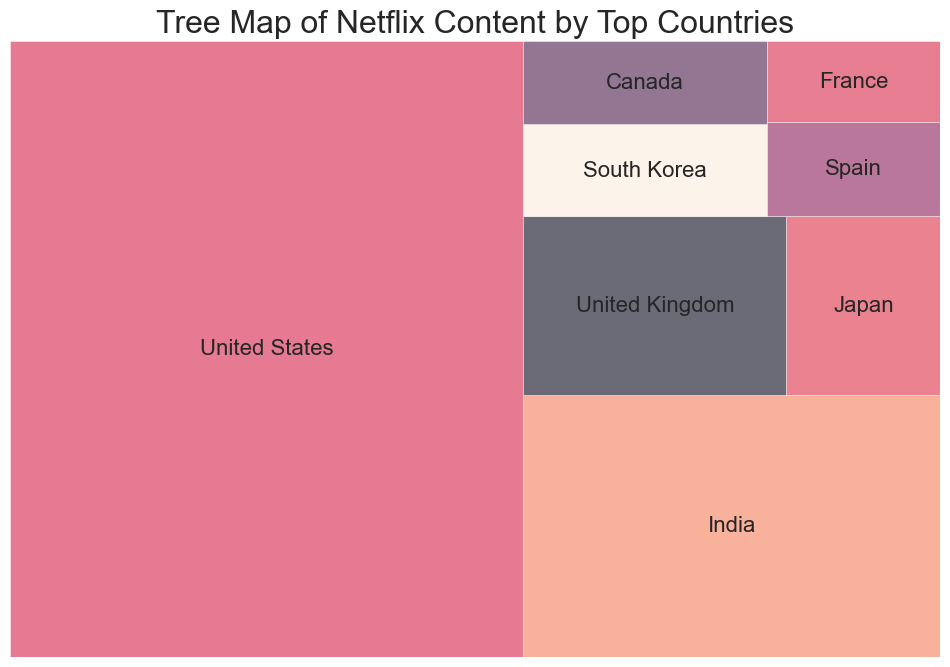

In [57]:
import squarify

#Tree map for the top 8 countries
tree_map = {
    'labels': top_country_data['country'].value_counts().index,
    'values': top_country_data['country'].value_counts().values
}
plt.figure(figsize=(12, 8))
plt.title('Tree Map of Netflix Content by Top Countries')
squarify.plot(sizes=tree_map['values'], label=tree_map['labels'], alpha=0.6)
plt.axis('off')
plt.show()


In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns 
import pandas as pd


In [23]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

